**Task-02**

Perform data cleaning and EDA on a Titanic Dataset from Kaggle. Explore the relationship between variables and identify patterns and trends in the data.

**About the Dataset**

*Passenger ID* - To identify unique passengers

*Survived* - If they survived or not

*P Class* - The class where passengers travelled in 1st, 2nd, 3rd...

*Name* - Passenger Name

*Sex* - Gender of Passenger

*Age* - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*SibSp* - Number of siblings or spouse

*Parch* - Parent or child

*Ticket* - Ticket number

*Fare* - Amount paid for the ticket

*Cabin* - Cabin of residence

*Embarked* - Point of embarkmen

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_titanic = pd.read_csv('Titanic.csv')

In [ ]:
data_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Adult


In [ ]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_titanic.shape

(891, 12)

In [ ]:
data_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Dropping Unnecessary Columns**

In [ ]:
data_titanic.drop('Cabin',axis=1,inplace=True)

**Filling the missing values of the age column by Mean value of the column**

In [ ]:
data_titanic['Age'].fillna(data_titanic['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


**Filling the missing values of the embarked column by Mod value of the column**

In [ ]:
data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
data_titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


**Visualization**

Bar Chart

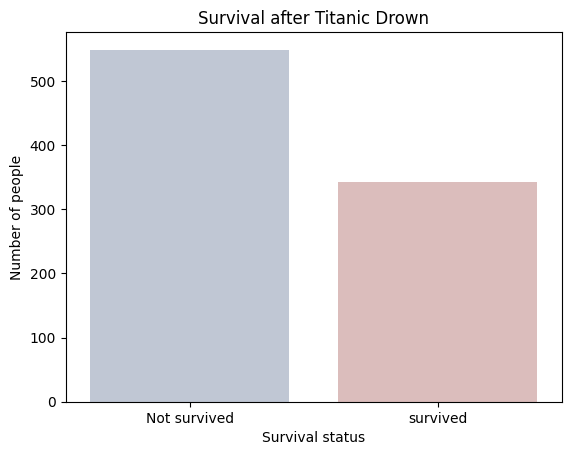

In [ ]:
sns.countplot(x='Survived',data=data_titanic,palette='vlag',)
plt.title("Survival after Titanic Drown")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Pie Chart

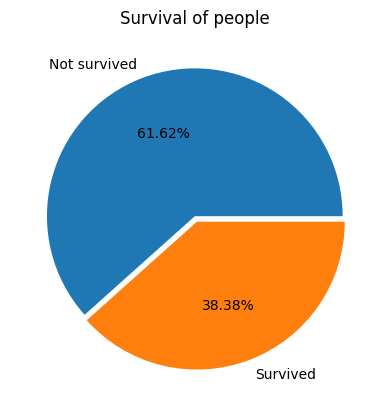

In [ ]:
plt.pie(data_titanic['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

Based on different gender

In [ ]:
data_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data_titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


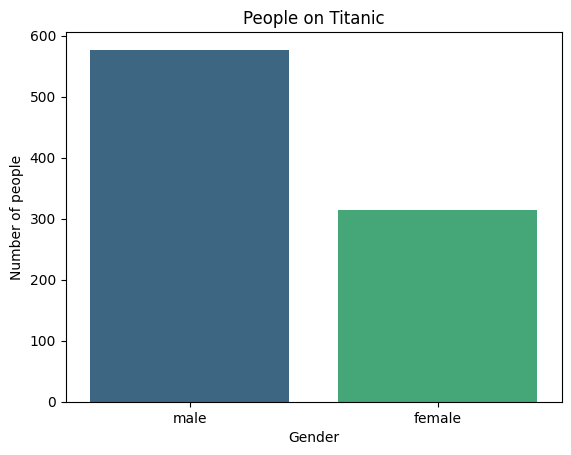

In [ ]:
sns.countplot(x='Sex',data=data_titanic,palette='viridis',)
plt.title("People on Titanic")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

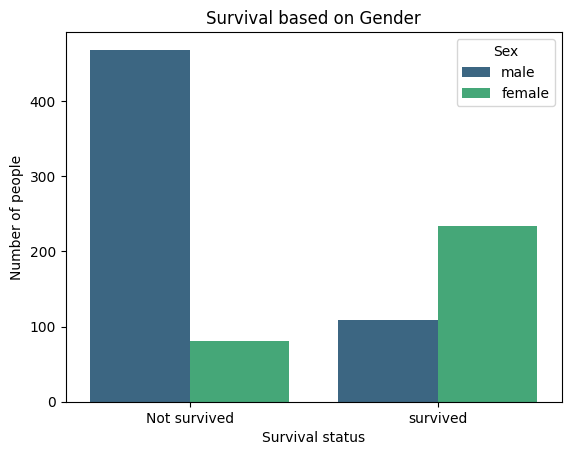

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=data_titanic,palette='viridis',)
plt.title("Survival based on Gender")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

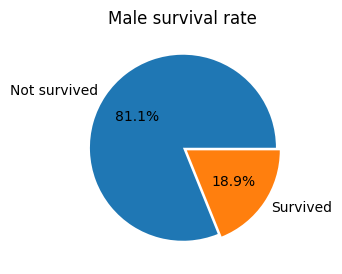

In [ ]:
data_titanic[data_titanic['Sex'] == 'male'].Survived.groupby(data_titanic.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

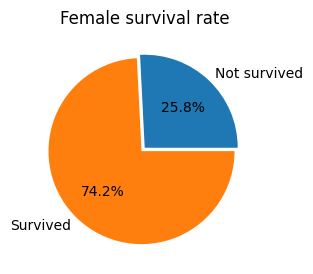

In [ ]:
data_titanic[data_titanic['Sex'] == 'female'].Survived.groupby(data_titanic.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

**Visualizing the Population of Different Passenger Class**

In [ ]:
data_titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


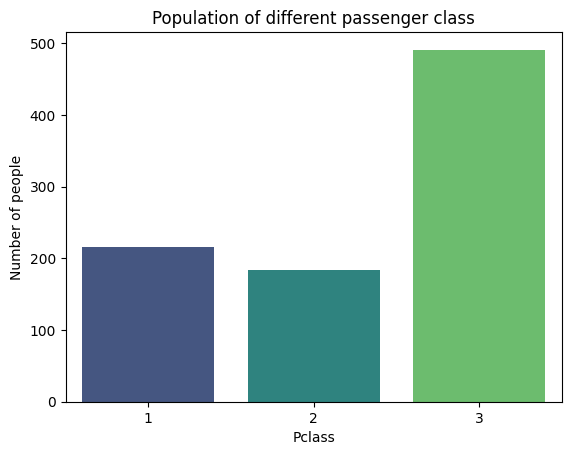

In [ ]:
sns.countplot(x='Pclass',data=data_titanic,palette='viridis',)
plt.title("Population of different passenger class")
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

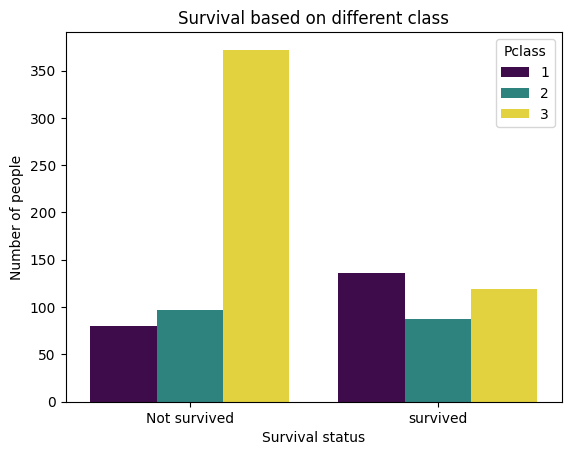

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=data_titanic,palette='viridis',)
plt.title("Survival based on different class")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Visualization of people survived from different **Embarkment**

In [ ]:
data_titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


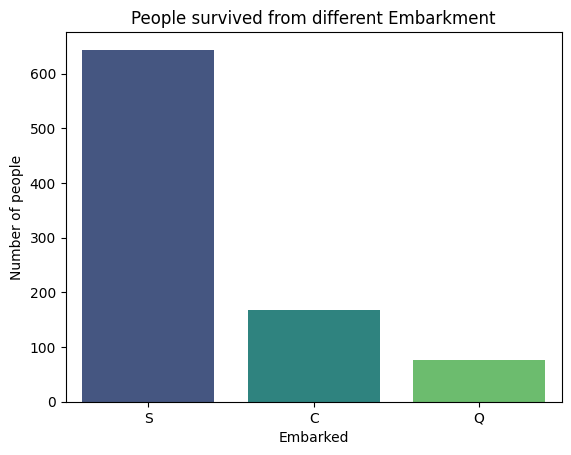

In [ ]:
sns.countplot(x='Embarked',data=data_titanic,palette='viridis',)
plt.title("People survived from different Embarkment")
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

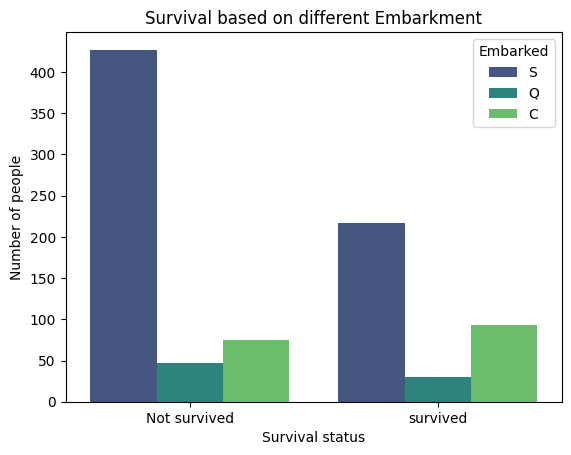

In [ ]:
sns.countplot(x='Survived',hue='Embarked',data=data_titanic,palette='viridis',)
plt.title("Survival based on different Embarkment")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

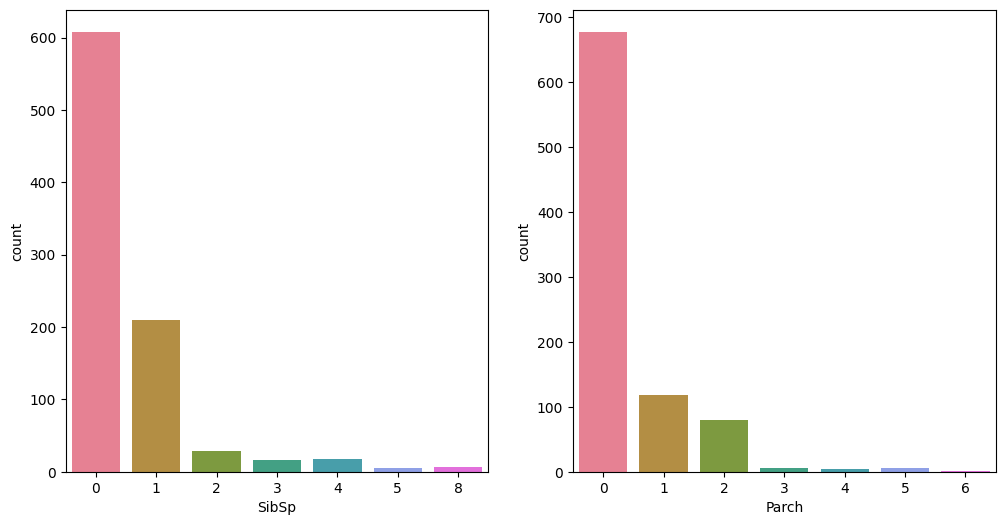

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=data_titanic,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=data_titanic,ax=axes[1],palette='husl')
plt.show()

**Survival Population of Sibsp**

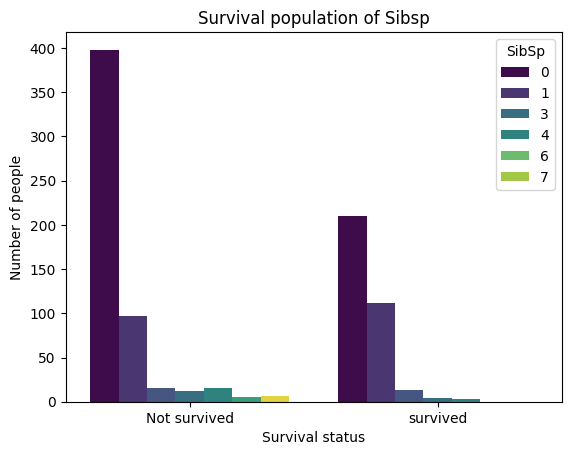

In [ ]:
sns.countplot(x ='Survived', hue='SibSp',data=data_titanic,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()



**Survival Population of Parch**

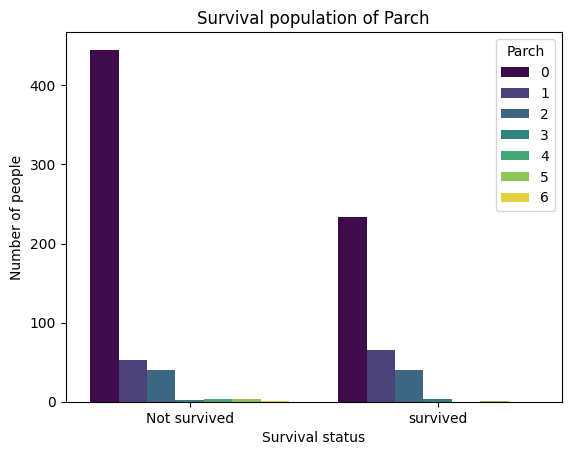

In [ ]:

sns.countplot(x ='Survived',hue='Parch',data=data_titanic,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

**Distribution of Fare and age**

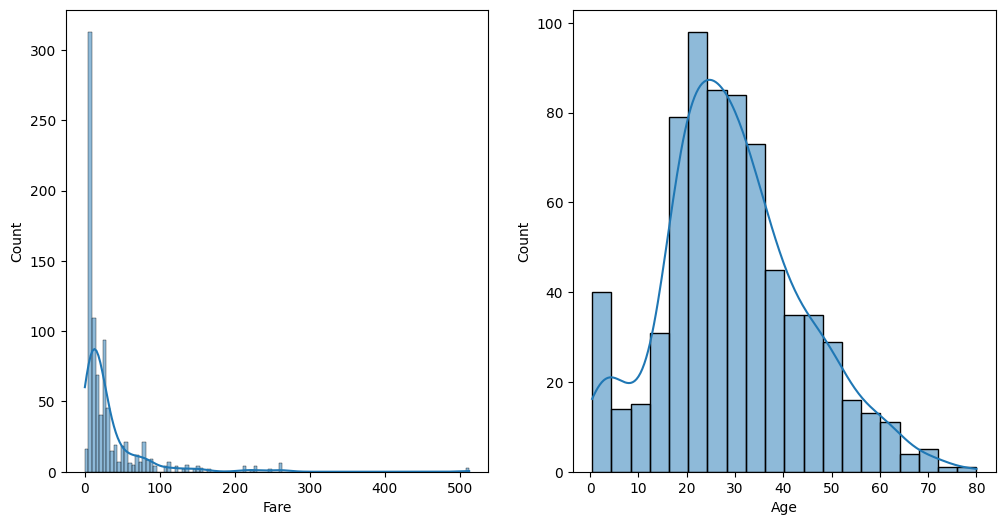

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_titanic['Fare'], kde=True,ax=axes[0])
sns.histplot(data_titanic['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

**Visualizing survival rate in different age category**

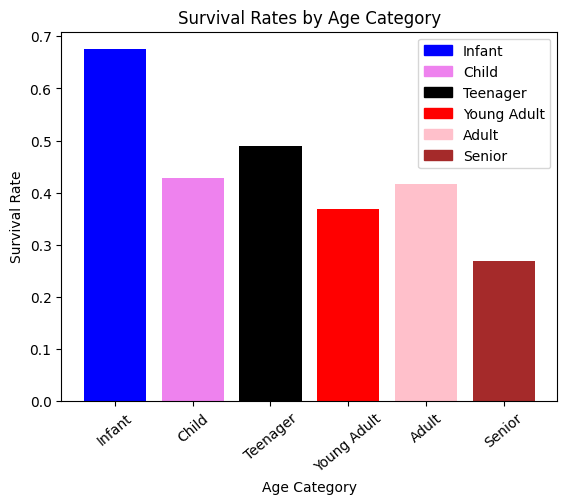

In [ ]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
data_titanic['Age_categories'] = pd.cut(data_titanic['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = data_titanic.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'violet', 'black', 'red', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

In [ ]:
data_titanic.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Adult


In [ ]:
df_num = data_titanic[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

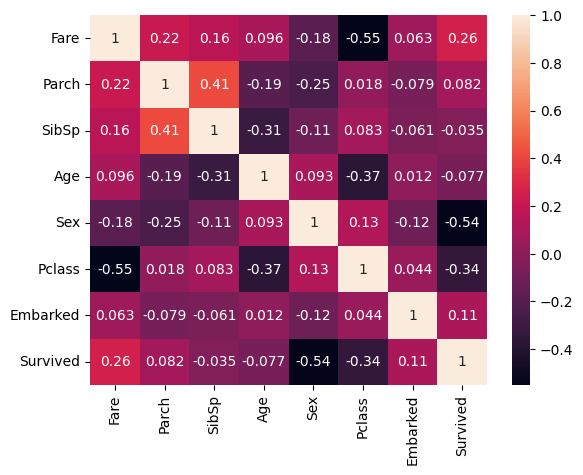

In [ ]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()
